In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/btcinusd/BTC-2019min.csv
/kaggle/input/btcinusd/BTC-Hourly.csv
/kaggle/input/btcinusd/BTC-Daily.csv
/kaggle/input/btcinusd/BTC-2020min.csv
/kaggle/input/btcinusd/BTC-2017min.csv
/kaggle/input/btcinusd/BTC-2018min.csv
/kaggle/input/btcinusd/BTC-2021min.csv


In [10]:
def read_all_csv_as_dict(folder_path):
    import pandas as pd, glob, os
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
    return {
        os.path.splitext(os.path.basename(path))[0]: pd.read_csv(path)
        for path in csv_files
    }


# Kullanımı
dataframes = read_all_csv_as_dict("/kaggle/input/btcinusd")

for name, df in dataframes.items():
    print(f"--- {name} ---")
    print(df.head(), "\n")



--- BTC-2019min ---
         unix                 date   symbol     open     high      low  \
0  1577836740  2019-12-31 23:59:00  BTC/USD  7167.30  7171.22  7167.30   
1  1577836680  2019-12-31 23:58:00  BTC/USD  7166.89  7167.30  7161.99   
2  1577836620  2019-12-31 23:57:00  BTC/USD  7164.22  7170.80  7161.65   
3  1577836560  2019-12-31 23:56:00  BTC/USD  7182.49  7182.49  7170.20   
4  1577836500  2019-12-31 23:55:00  BTC/USD  7175.69  7176.68  7175.69   

     close  Volume BTC    Volume USD  
0  7168.36    0.191448   1372.366393  
1  7167.30    0.568868   4077.245538  
2  7166.89    3.959440  28376.874525  
3  7170.20    6.248892  44805.802550  
4  7176.68    0.016877    121.122623   

--- BTC-Hourly ---
         unix                 date   symbol      open      high       low  \
0  1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1  1646089200  2022-02-28 23:00:00  BTC/USD  43085.30  43364.81  42892.37   
2  1646085600  2022-02-28 22:00:00  BTC/USD  4165

In [11]:
for name, df in dataframes.items():
    print("--- " + name + " datasetindeki 'symbol' kolonu ---")
    """"print(f"---{name} datasetindeki 'symbol' kolonu---")"""
    if 'symbol' in df.columns:
        print(df['symbol'])  # İlk 5 satırı gösterir
    else:
        print("Bu dataset'te 'symbol' kolonu yok!")
    print("\n")


--- BTC-2019min datasetindeki 'symbol' kolonu ---
0         BTC/USD
1         BTC/USD
2         BTC/USD
3         BTC/USD
4         BTC/USD
           ...   
525594    BTC/USD
525595    BTC/USD
525596    BTC/USD
525597    BTC/USD
525598    BTC/USD
Name: symbol, Length: 525599, dtype: object


--- BTC-Hourly datasetindeki 'symbol' kolonu ---
0        BTC/USD
1        BTC/USD
2        BTC/USD
3        BTC/USD
4        BTC/USD
          ...   
33254    BTC/USD
33255    BTC/USD
33256    BTC/USD
33257    BTC/USD
33258    BTC/USD
Name: symbol, Length: 33259, dtype: object


--- BTC-Daily datasetindeki 'symbol' kolonu ---
0       BTC/USD
1       BTC/USD
2       BTC/USD
3       BTC/USD
4       BTC/USD
         ...   
2646    BTC/USD
2647    BTC/USD
2648    BTC/USD
2649    BTC/USD
2650    BTC/USD
Name: symbol, Length: 2651, dtype: object


--- BTC-2020min datasetindeki 'symbol' kolonu ---
0         BTC/USD
1         BTC/USD
2         BTC/USD
3         BTC/USD
4         BTC/USD
           ...   

In [12]:
for name, df in dataframes.items():
    print(f"--- {name} ---")
    print(df.info(), "\n")

--- BTC-2019min ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525599 entries, 0 to 525598
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        525599 non-null  int64  
 1   date        525599 non-null  object 
 2   symbol      525599 non-null  object 
 3   open        525599 non-null  float64
 4   high        525599 non-null  float64
 5   low         525599 non-null  float64
 6   close       525599 non-null  float64
 7   Volume BTC  525599 non-null  float64
 8   Volume USD  525599 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 36.1+ MB
None 

--- BTC-Hourly ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        33259 non-null  int64  
 1   date        33259 non-null  object 
 2   symbol      33259 non-null  object 
 3   o

In [13]:
for name ,df in dataframes.items():
    print(df.columns)

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')
Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')
Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')
Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')
Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')
Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')
Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')


In [18]:
import pandas as pd
# Her dataframe için gerekli dönüşümleri yap ve korelasyon matrisini yazdır 
for name, df in dataframes.items():
    print(f"--- {name} ---")
    
    # Sayısal olan sütunların korelasyonunu al (object olanları hariç tutar)
    corr_matrix = df.corr(numeric_only=True)
    
    print(corr_matrix, "\n")



--- BTC-2019min ---
                unix      open      high       low     close  Volume BTC  \
unix        1.000000  0.664378  0.664267  0.664558  0.664376   -0.019602   
open        0.664378  1.000000  0.999996  0.999996  0.999994    0.053228   
high        0.664267  0.999996  1.000000  0.999993  0.999996    0.054208   
low         0.664558  0.999996  0.999993  1.000000  0.999996    0.052033   
close       0.664376  0.999994  0.999996  0.999996  1.000000    0.053134   
Volume BTC -0.019602  0.053228  0.054208  0.052033  0.053134    1.000000   
Volume USD  0.047001  0.166712  0.167752  0.165442  0.166615    0.944755   

            Volume USD  
unix          0.047001  
open          0.166712  
high          0.167752  
low           0.165442  
close         0.166615  
Volume BTC    0.944755  
Volume USD    1.000000   

--- BTC-Hourly ---
                unix      open      high       low     close  Volume BTC  \
unix        1.000000  0.824565  0.824581  0.824588  0.824586   -0.266131  

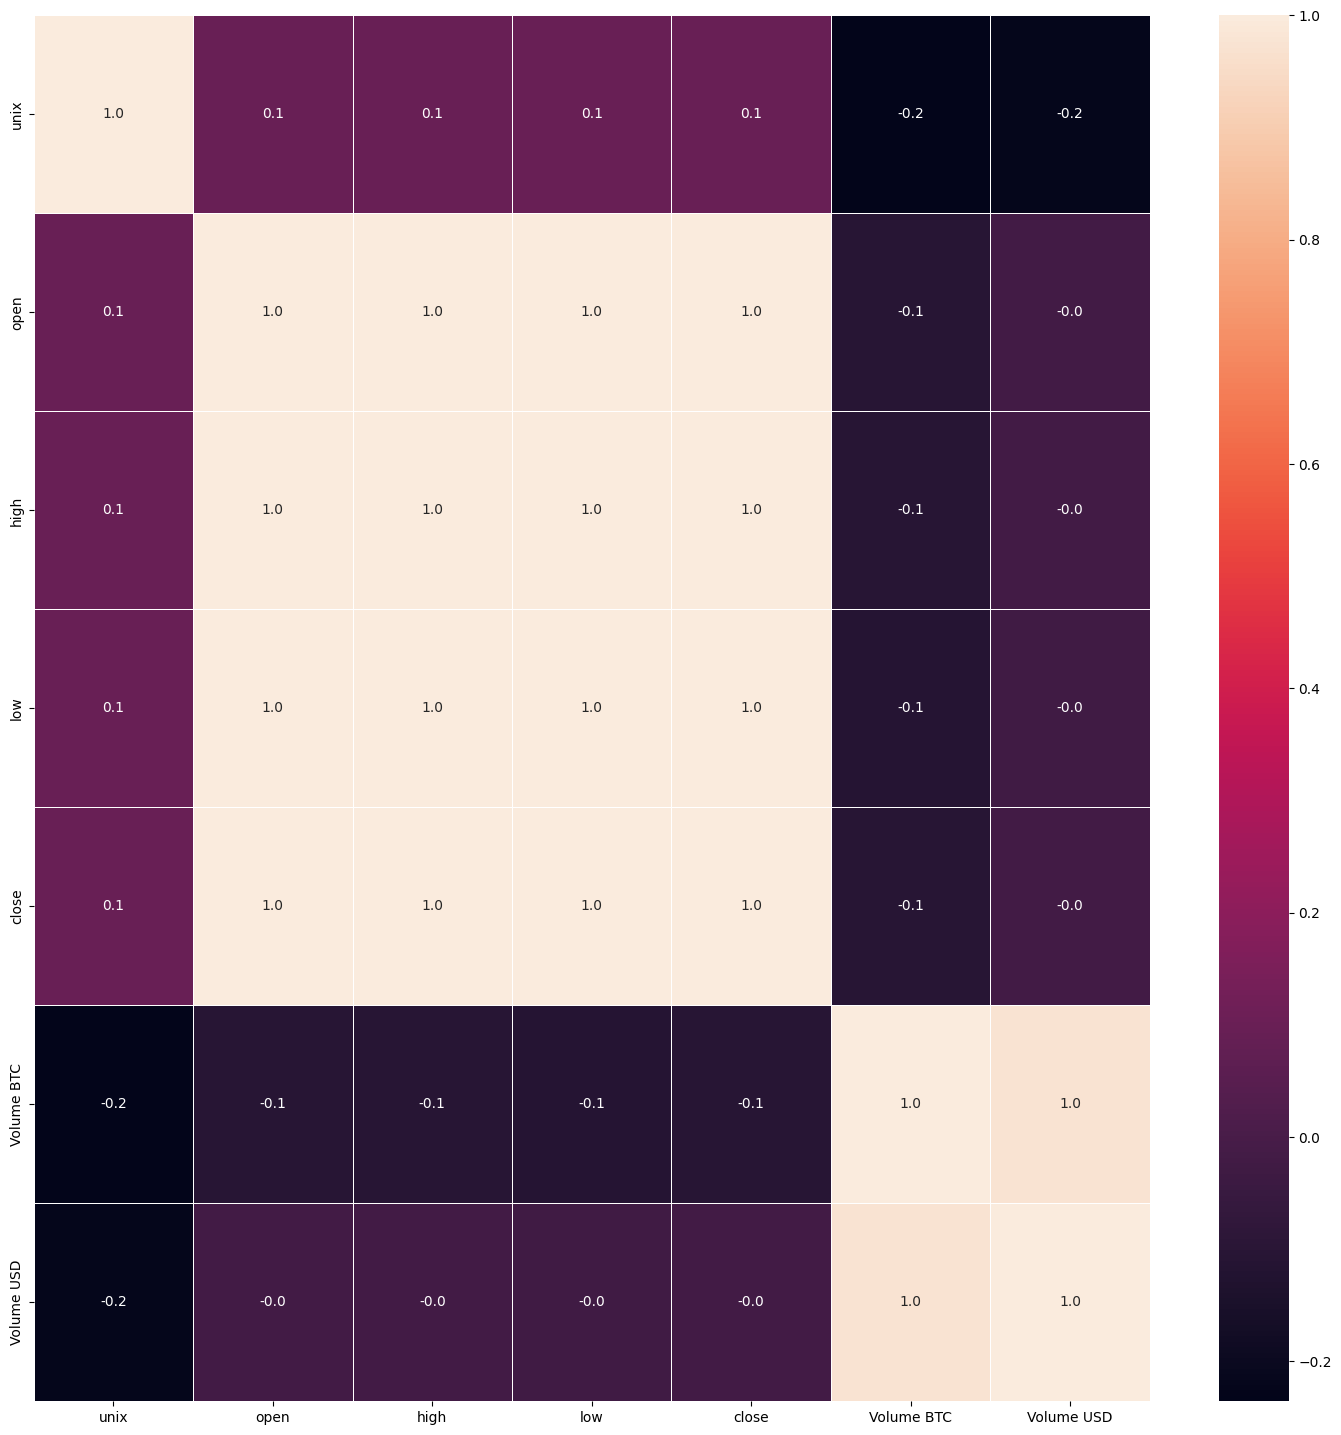

In [22]:
f,ax = plt.subplots(figsize= (18,18)) 
sns.heatmap(corr_matrix, annot = True, linewidth = .5, fmt = '.1f',ax=ax )
plt.show()


In [16]:
for name, df in dataframes.items():
    print(f"----{name}---")
    print(df.head(10))

----BTC-2019min---
         unix                date   symbol     open     high      low  \
0  1577836740 2019-12-31 23:59:00  BTC/USD  7167.30  7171.22  7167.30   
1  1577836680 2019-12-31 23:58:00  BTC/USD  7166.89  7167.30  7161.99   
2  1577836620 2019-12-31 23:57:00  BTC/USD  7164.22  7170.80  7161.65   
3  1577836560 2019-12-31 23:56:00  BTC/USD  7182.49  7182.49  7170.20   
4  1577836500 2019-12-31 23:55:00  BTC/USD  7175.69  7176.68  7175.69   
5  1577836440 2019-12-31 23:54:00  BTC/USD  7172.47  7175.20  7172.47   
6  1577836380 2019-12-31 23:53:00  BTC/USD  7180.86  7180.86  7174.07   
7  1577836320 2019-12-31 23:52:00  BTC/USD  7176.25  7177.80  7171.69   
8  1577836260 2019-12-31 23:51:00  BTC/USD  7170.20  7180.18  7170.20   
9  1577836200 2019-12-31 23:50:00  BTC/USD  7164.21  7170.66  7164.21   

     close  Volume BTC    Volume USD  
0  7168.36    0.191448   1372.366393  
1  7167.30    0.568868   4077.245538  
2  7166.89    3.959440  28376.874525  
3  7170.20    6.24889

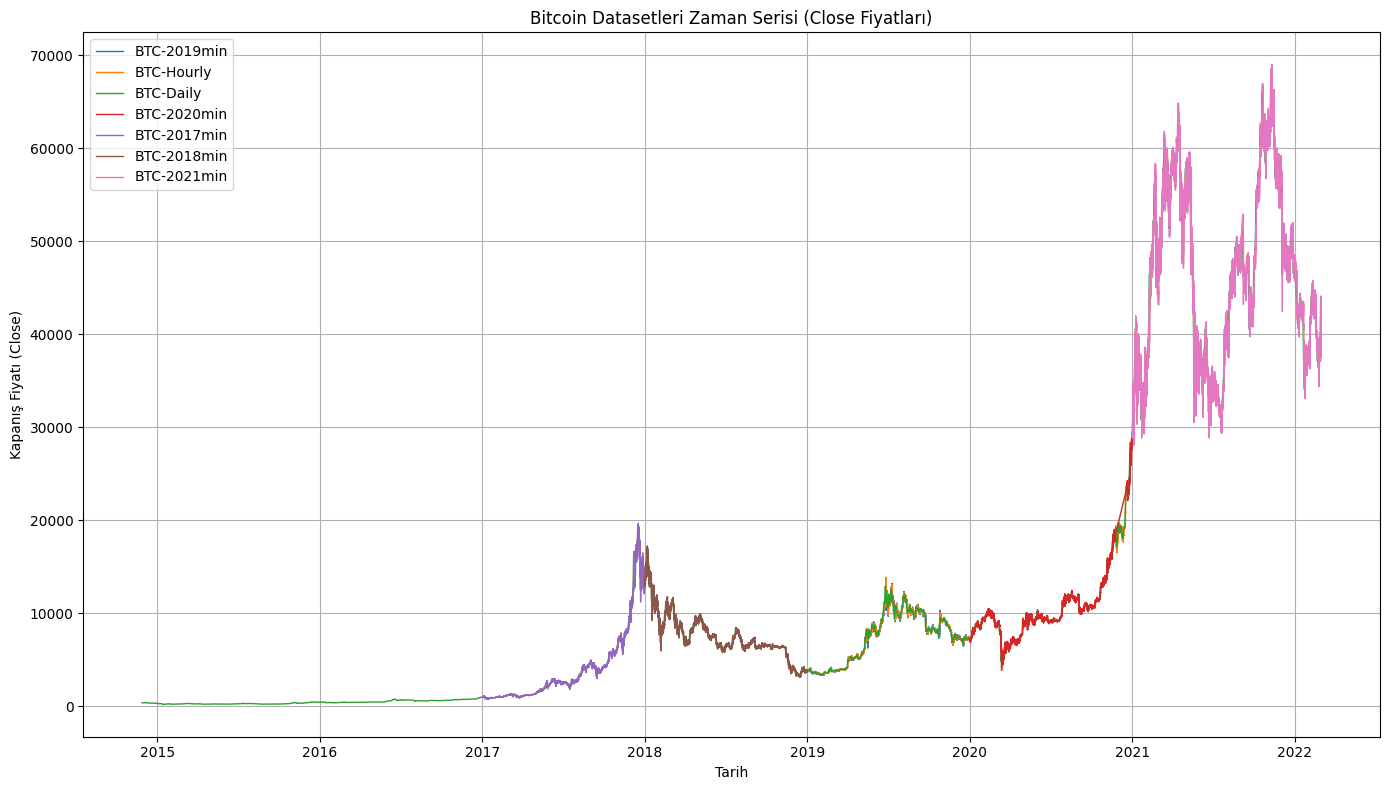

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 8))

for name, df in dataframes.items():
    if 'date' in df.columns and 'close' in df.columns:
        # Tarihi datetime formatına çevir
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df = df.dropna(subset=['date'])  # Hatalı tarihleri temizle

        # Tarihe göre sırala (garanti olması için)
        df = df.sort_values('date')

        # Line chart: tarih vs kapanış fiyatı
        plt.plot(df['date'], df['close'], label=name, linewidth=1)

plt.title("Bitcoin Datasetleri Zaman Serisi (Close Fiyatları)")
plt.xlabel("Tarih")
plt.ylabel("Kapanış Fiyatı (Close)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


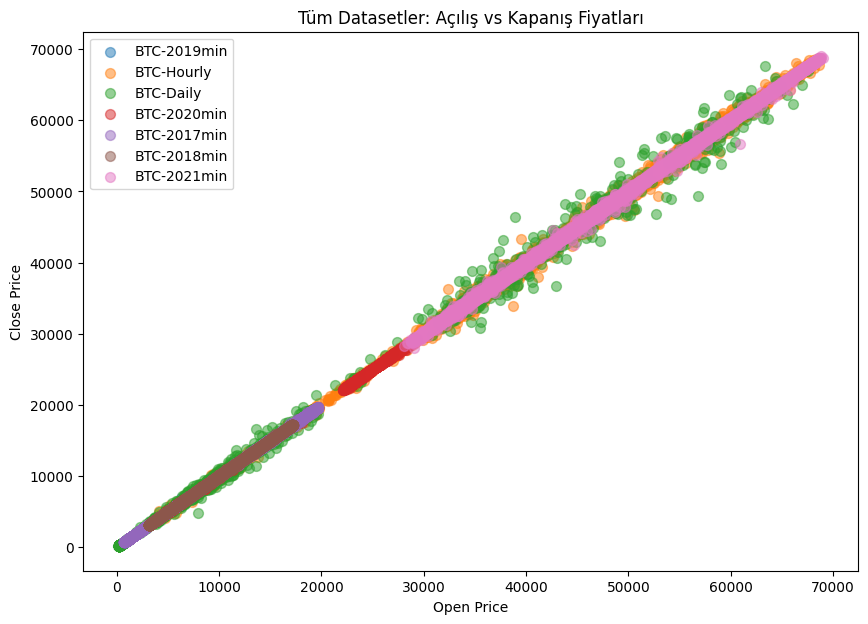

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

for name, df in dataframes.items():
    if 'open' in df.columns and 'close' in df.columns:
        plt.scatter(df['open'], df['close'], alpha=0.5, s=50, label=name)

plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Tüm Datasetler: Açılış vs Kapanış Fiyatları')
plt.legend()
plt.show()


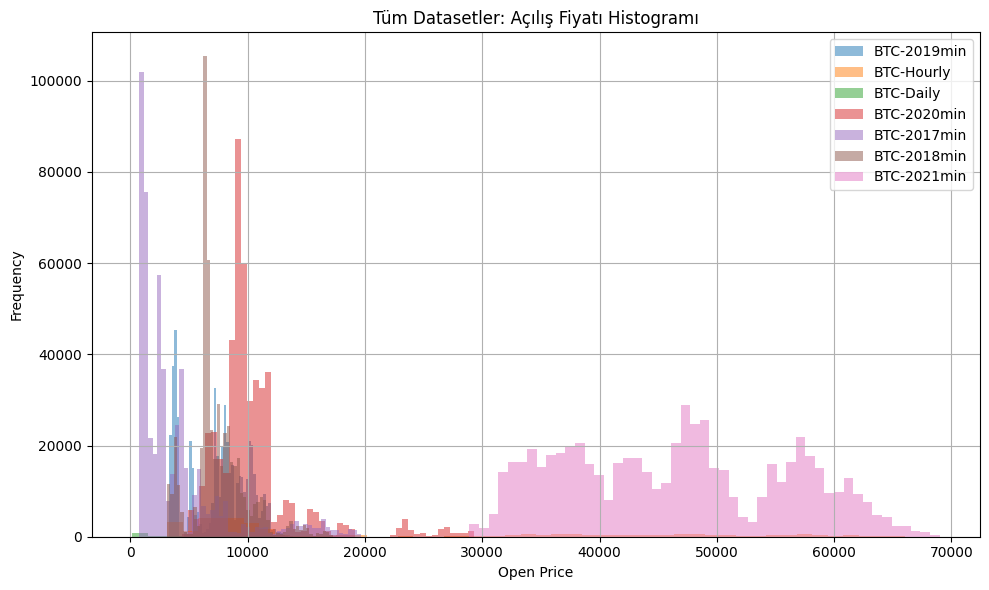

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, df in dataframes.items():
    if 'open' in df.columns:
        plt.hist(df['open'], bins=50, alpha=0.5, label=name)

plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Tüm Datasetler: Açılış Fiyatı Histogramı')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()